# Regional Flash Flood in Germany (2021-07-14)

### Determining the catchment areas for the rivers Rur, Erft, Ahr, Wupper and Ruhr:

The dataset was downloaded and the measurements needed were added (all taken from their respective Wikipedia pages). The file was then read into a pandas dataframe, already setting the index as the river names.

In [1]:
import pandas as pd


dataset_path = "data/catchments.csv"
df = pd.read_csv(dataset_path, index_col="River")

After that, I proceeded to rename the columns as requested:

In [2]:
df = df.rename(index={"River": "river"}, columns={" Length (km)": "length", " Area (km^2)": "area"})

Checking if everything worked properly:

In [3]:
df.head()

,length,area
River,,
Rur,164.5,2361.000
Erft,106.6,1837.915
Ahr,89.0,900.000
Wupper,115.8,813.000
Ruhr,219.2,4485.000


Now it's time to plot the graphs for area and length of all five rivers:

Text(0, 0.5, 'Area in $m^2$')

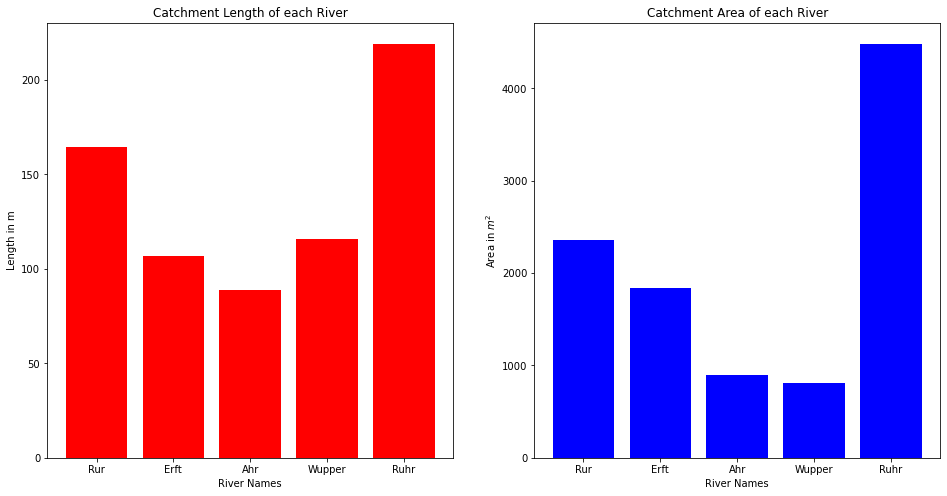

In [6]:
import matplotlib.pyplot as plt


fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.set_title("Catchment Length of each River")
ax1.set_xlabel("River Names")
ax1.set_ylabel("Length in m")
ax1.bar(x=df.index, height=df['length'], color="red")

ax2.bar(x=df.index, height=df['area'], color="blue")
ax2.set_title("Catchment Area of each River")
ax2.set_xlabel("River Names")
ax2.set_ylabel("Area in $m^2$")


### Determining the cumulative precipitation at some weather stations in the five catchments

To begin the analysis, data from five weather stations in the five relevant river catchments was taken from the DWD website. The stations analysed were 3499, 3591, 5717, 4219 and 7378. The downloaded data was then loaded separately into dataframes.

The interval from July 12th to July 15th  catches the rain event in all five stations.

In [7]:
date_from = pd.to_datetime("2021-07-12T12:00:00UTC")
date_to = pd.to_datetime("2021-07-15T12:00:00UTC")

This next function is used to normalize the values in the index and the names of the columns. It was taken from the assignment page.

In [9]:
def prec_ts_to_df(filename):
    from datetime import datetime
    
    dateparse = lambda dates: [datetime.strptime(str(d), '%Y%m%d%H') for d in dates]

    df = pd.read_csv(filename, delimiter=";", encoding="cp1252", 
                     index_col="MESS_DATUM", parse_dates = ["MESS_DATUM"], date_parser = dateparse, 
                     na_values = [-999.0, -999])

    # Column headers: remove leading blanks (strip), replace " " with "_", and convert to lower case.
    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    df.index.name = df.index.name.strip().lower().replace(' ', '_').replace('(', '').replace(')', '')
    # Add time zone: convert from tz naive datetime to tz aware datetime.
    df.index = df.index.tz_localize(tz ='UTC')
    return(df)


**Station 3499**

In [19]:
path_3499 = r"./data/DWD/stundenwerte_RR_03499_akt/"
filename_3499 = r"produkt_rr_stunde_20200222_20210824_03499.txt"
pfname_3499 = path_3499 + filename_3499
df_3499 = prec_ts_to_df(pfname_3499)
idx_3499 = (df_3499.index >= date_from) & (df_3499.index <= date_to)

**Station 3591**

In [20]:
path_3591 = r"./data/DWD/stundenwerte_RR_03591_akt/"
filename_3591 = r"produkt_rr_stunde_20200222_20210824_03591.txt"
pfname_3591 = path_3591 + filename_3591
df_3591 = prec_ts_to_df(pfname_3591)
idx_3591 = (df_3591.index >= date_from) & (df_3591.index <= date_to)

**Station 4219**

In [21]:
path_4219 = r"./data/DWD/stundenwerte_RR_04219_akt/"
filename_4219 = r"produkt_rr_stunde_20200222_20210824_04219.txt"
pfname_4219 = path_4219 + filename_4219
df_4219 = prec_ts_to_df(pfname_4219)
idx_4219 = (df_4219.index >= date_from) & (df_4219.index <= date_to)

**Station 5717**

In [22]:
path_5717 = r"./data/DWD/stundenwerte_RR_05717_akt/"
filename_5717 = r"produkt_rr_stunde_20200223_20210825_05717.txt"
pfname_5717 = path_5717 + filename_5717
df_5717 = prec_ts_to_df(pfname_5717)
idx_5717 = (df_5717.index >= date_from) & (df_5717.index <= date_to)

**Station 7378**

In [23]:
path_7378 = r"./data/DWD/stundenwerte_RR_07378_akt/"
filename_7378 = r"produkt_rr_stunde_20200222_20210824_07378.txt"
pfname_7378 = path_7378 + filename_7378
df_7378 = prec_ts_to_df(pfname_7378)
idx_7378 = (df_7378.index >= date_from) & (df_7378.index <= date_to)

Now, to extract the desired data from the dataframes:

In [24]:
df_r1_3499 = df_3499[['r1']].rename(columns={'r1' : '3499'})
df_r1_3591 = df_3591[['r1']].rename(columns={'r1' : '3591'})
df_r1_5717 = df_5717[['r1']].rename(columns={'r1' : '5717'})
df_r1_4219 = df_4219[['r1']].rename(columns={'r1' : '4219'})
df_r1_7378 = df_7378[['r1']].rename(columns={'r1' : '7378'})

Checking if the dataframes are correct:

In [25]:
df_r1_3499.head()

,3499
mess_datum,
2020-02-22 00:00:00+00:00,0.0
2020-02-22 01:00:00+00:00,0.0
2020-02-22 02:00:00+00:00,0.0
2020-02-22 03:00:00+00:00,0.0
2020-02-22 04:00:00+00:00,0.0


#### 1.

Adding the selected stations to the .csv file and re-reading it:

In [54]:
file_ext = "data/catchments_ext.csv"

df = pd.read_csv(file_ext, index_col="river")
df.head()

,length,area,station_id
river,,,
Rur,164.5,2361.000,3591
Erft,106.6,1837.915,7378
Ahr,89.0,900.000,4219
Wupper,115.8,813.000,5717
Ruhr,219.2,4485.000,3499


#### 2.

Merging them all into a single, wider dataframe, we have:

In [27]:
df_RR = pd.concat([df_r1_03499, df_r1_03591, df_r1_05717, df_r1_04219, df_r1_07378], axis=1)
df_RR.head()

,03499,03591,05717,04219,07378
mess_datum,,,,,
2020-02-22 00:00:00+00:00,0.0,0.0,NaN,0.0,0.0
2020-02-22 01:00:00+00:00,0.0,0.0,NaN,0.0,0.0
2020-02-22 02:00:00+00:00,0.0,0.0,NaN,0.0,0.0
2020-02-22 03:00:00+00:00,0.0,0.0,NaN,0.0,0.0
2020-02-22 04:00:00+00:00,0.0,0.0,NaN,0.0,0.0


The dataframe has data since 2020, so, to correct this:

In [28]:
df_RR = df_RR[df_RR.index >= date_from]
df_RR = df_RR[df_RR.index <= date_to]

Checking the data:

In [30]:
df_RR.head()

,03499,03591,05717,04219,07378
mess_datum,,,,,
2021-07-12 12:00:00+00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 13:00:00+00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 14:00:00+00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 15:00:00+00:00,0.0,0.0,0.0,0.0,0.0
2021-07-12 16:00:00+00:00,0.0,0.0,0.0,0.0,0.0


#### 3.

Plotting the data, firstly in a bar chart:

(matplotlib.pyplot is being used here only to make a better legend)

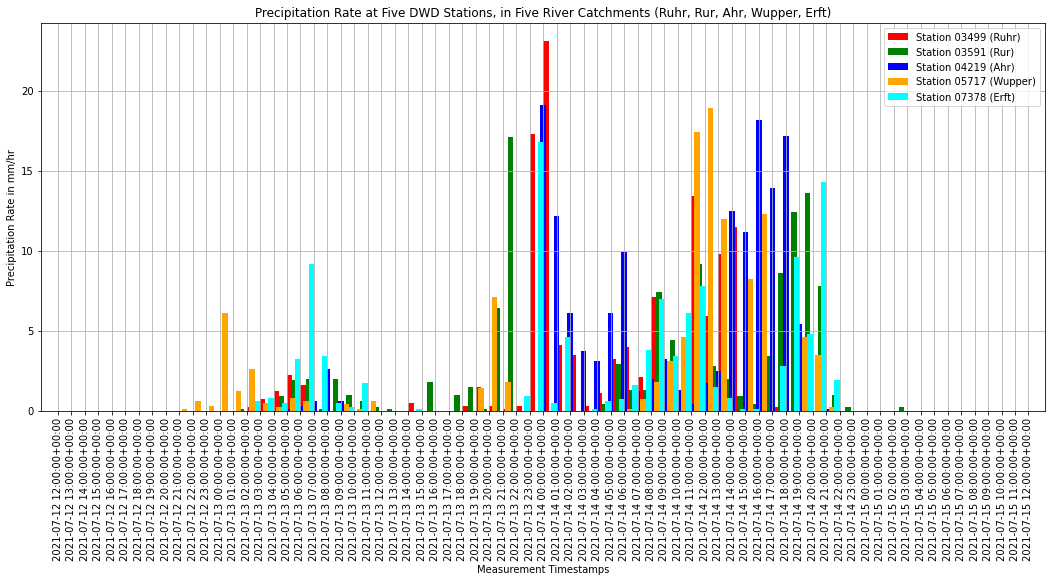

In [36]:
import matplotlib.pyplot as plt


df_RR.plot.bar(
    figsize=(18,8),
    grid=True, 
    color={
        '03499': 'red',
        '03591': 'green',
        '04219': 'orange',
        '05717': 'blue',
        '07378': 'cyan'
    }, 
    title="Precipitation Rate at Five DWD Stations, in Five River Catchments (Ruhr, Rur, Ahr, Wupper, Erft)",
    xlabel="Measurement Timestamps",
    ylabel="Precipitation Rate in mm/hr",
    width=2
)

plt.subplots_adjust(bottom=0.3, top=0.973)
plt.legend([
        'Station 03499 (Ruhr)',
        'Station 03591 (Rur)',
        'Station 04219 (Ahr)',
        'Station 05717 (Wupper)',
        'Station 07378 (Erft)'
])

Now to create a heatmap, with the dates on the x axis, a transpose is needed on the dataframe:

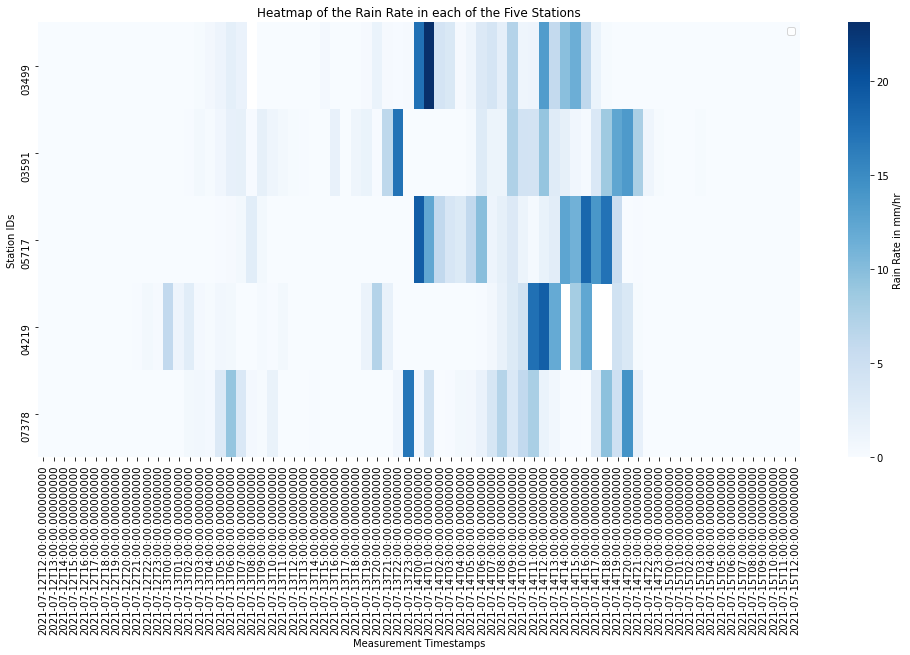

In [44]:
import seaborn as sns


df_RR_trans = df_RR.transpose()
plt.figure(figsize=(18,8))
sns.heatmap(df_RR_trans,
            cmap='Blues',
            cbar_kws={'label': 'Rain Rate in mm/hr'}
           )

plt.title("Heatmap of the Rain Rate in each of the Five Stations")
plt.xlabel("Measurement Timestamps")
plt.ylabel("Station IDs")
plt.legend(['Station 03499 (Ruhr)',
            'Station 03591 (Rur)',
            'Station 04219 (Ahr)',
            'Station 05717 (Wupper)',
            'Station 07378 (Erft)'
           ])
plt.subplots_adjust(
    left=0.265,
    right=1
)

Finding the cumulative precipitation of the five catchment areas through the cumsum() function:

In [45]:
cumsum = df_RR.cumsum()

Plotting the line graphs for the five cumulative precipitations:

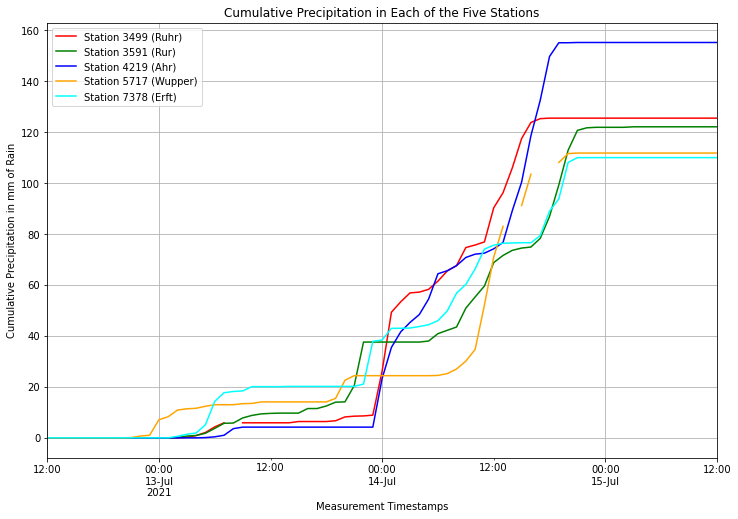

In [46]:
cumsum.plot.line(
    figsize=(12,8),
    grid=True,
    color={
        '03499': 'red',
        '03591': 'green',
        '04219': 'orange',
        '05717': 'blue',
        '07378': 'cyan'
        },
        title="Cumulative Precipitation in Each of the Five Stations",
        xlabel="Measurement Timestamps",
        ylabel="Cumulative Precipitation in mm of Rain"        
)

plt.legend([
        'Station 3499 (Ruhr)',
        'Station 3591 (Rur)',
        'Station 4219 (Ahr)',
        'Station 5717 (Wupper)',
        'Station 7378 (Erft)'
])

As there is some data missing, an interpolation can be done to get a better idea of what the full graph looks like.

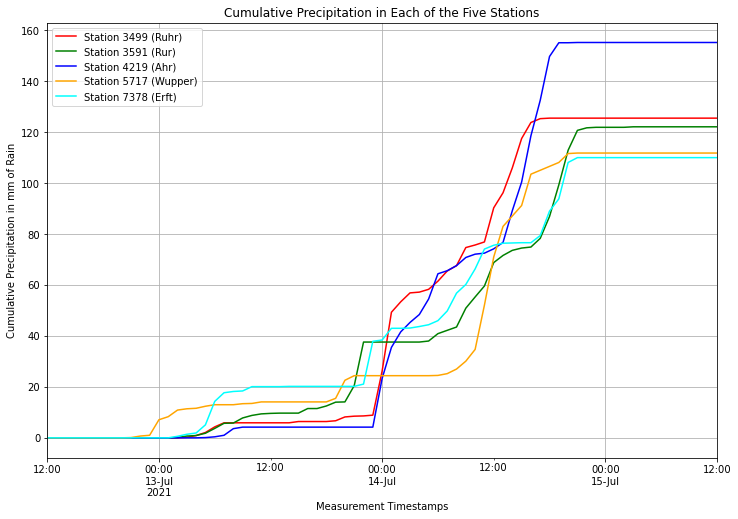

In [49]:
cumsum = cumsum.interpolate(method='linear', limit_direction='forward')

cumsum.plot.line(
    figsize=(12,8),
    grid=True,
    color={
        '03499': 'red',
        '03591': 'green',
        '04219': 'orange',
        '05717': 'blue',
        '07378': 'cyan'
        },
        title="Cumulative Precipitation in Each of the Five Stations",
        xlabel="Measurement Timestamps",
        ylabel="Cumulative Precipitation in mm of Rain"        
)

plt.legend([
        'Station 3499 (Ruhr)',
        'Station 3591 (Rur)',
        'Station 4219 (Ahr)',
        'Station 5717 (Wupper)',
        'Station 7378 (Erft)'
])

From this information and the analysis of the graph, it can be seen that the rain seems to have started around the 13th of July in the Wupper region, then going a bit stronger to the Erft region, and less badly on the other three catchment areas. After that the rain seems to have increased in all five areas analysed, from July 14th, until the 15th, where it stabilises.

To add another column to the csv file, with the total precipitation numbers, print the values from cumsum:

In [50]:
cumsum.tail()

,03499,03591,05717,04219,07378
mess_datum,,,,,
2021-07-15 08:00:00+00:00,125.5,122.1,155.2,111.8,110.0
2021-07-15 09:00:00+00:00,125.5,122.1,155.2,111.8,110.0
2021-07-15 10:00:00+00:00,125.5,122.1,155.2,111.8,110.0
2021-07-15 11:00:00+00:00,125.5,122.1,155.2,111.8,110.0
2021-07-15 12:00:00+00:00,125.5,122.1,155.2,111.8,110.0


In [108]:
file_ext_2 = "data/catchments_ext_2.csv"

df = pd.read_csv(file_ext_2, index_col="river")
df.head()

,length,area,station_id,cumsum_rr
river,,,,
Rur,164.5,2361.000,3591,122.1
Erft,106.6,1837.915,7378,110.0
Ahr,89.0,900.000,4219,111.8
Wupper,115.8,813.000,5717,155.2
Ruhr,219.2,4485.000,3499,125.5


### Comparing this event to typical July historical precipitation

#### 1.

The station to be analysed is Station 5717, which has historical data since 1907, with less unrecorded data throughout the years.

The data for analysis was downloaded from the DWD website and has to be filtered to meet the timeframe required (1961-1990), and also the month required (July). For that:

In [109]:
hist_date_from = pd.to_datetime("1961-07-01")
hist_date_to = pd.to_datetime("1990-12-01")

A slightly different function, derived from the one contained on the assignment page, needs to be used to properly parse the data in the new dataframe.

In [110]:
def prec_ts_to_df_hist(filename):
    from datetime import datetime
    
    dateparse = lambda dates: [datetime.strptime(str(d), '%Y%m%d') for d in dates]

    df = pd.read_csv(filename, delimiter=";", encoding="cp1252", 
                     index_col="MESS_DATUM_BEGINN", parse_dates = ["MESS_DATUM_BEGINN", "MESS_DATUM_ENDE"], 
                     date_parser = dateparse, na_values = [-999.0, -999])
    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
    df.index.name = df.index.name.strip().lower().replace(' ', '_').replace('(', '').replace(')', '')
    
    return(df)

In [111]:
path_hist = r"./data/DWD/historical/monatswerte_KL_05717_19070101_20201231_hist/"
filename_hist = r"produkt_klima_monat_19070101_20201231_05717.txt"
pfname_hist = path_hist + filename_hist
df_hist = prec_ts_to_df_hist(pfname_hist)
df_hist = df_hist_5717[['mess_datum_ende','mo_rr']]

Checking the dataframe:

In [112]:
df_hist.head()

,mess_datum_ende,mo_rr
mess_datum_beginn,,
1907-01-01,1907-01-31,NaN
1907-02-01,1907-02-28,NaN
1907-03-01,1907-03-31,NaN
1907-04-01,1907-04-30,NaN
1907-05-01,1907-05-31,NaN


Limiting the data from 1961 to 1990:

In [113]:
df_hist = df_hist[df_hist.index >= hist_date_from]
df_hist = df_hist[df_hist.index <= hist_date_to]

Checking:

In [114]:
df_hist.head()

,mess_datum_ende,mo_rr
mess_datum_beginn,,
1961-07-01,1961-07-31,146.9
1961-08-01,1961-08-31,104.7
1961-09-01,1961-09-30,82.4
1961-10-01,1961-10-31,128.6
1961-11-01,1961-11-30,124.7


Now to parse through to get only July values of each year:

In [115]:
temp_hist = []

for date in df_hist.index:
    if date.month == 7:
        temp_hist.append(df_hist.loc[date])
    
    
df_july_rr = pd.DataFrame(temp_hist)

Checking the parsing:

In [116]:
df_july_rr.head()

,mess_datum_ende,mo_rr
1961-07-01,1961-07-31,146.9
1962-07-01,1962-07-31,113.7
1963-07-01,1963-07-31,44.3
1964-07-01,1964-07-31,48.4
1965-07-01,1965-07-31,266.1


Getting the average values from the whole period:

In [117]:
max_cumsum = df_july_rr['mo_rr'].cumsum().iloc[-1]
avg_rr = max_cumsum / len(df_july_rr)
avg_rr

102.3

With the average rainfall in this whole period, we can get the ratio of event and normal precipitation, as follows:

In [118]:
temp_list = []

for value in df_july_rr['mo_rr']:
    if value > avg_rr:
        temp_list.append(value)
        
len(temp_list)

12

Ratio would then be events divided by total:

In [119]:
ratio = len(temp_list) / len(df_july_rr)
ratio

0.4

#### 2.

For the annual precipitation analysis, another function was created, as can be seen below:

In [120]:
def get_desired_year(df, year, year_list):

    for date in df.index:
        if date.year == year:
            year_list.append(df['mo_rr'].loc[date])

    return year_list

This function needs to be called for every one of the thirty years of the time frame.

In [121]:
list1961 = []
get_desired_year(df_hist, 1961, list1961)
list1962 = []
get_desired_year(df_hist, 1962, list1962)
list1963 = []
get_desired_year(df_hist, 1963, list1963)
list1964 = []
get_desired_year(df_hist, 1964, list1964)
list1965 = []
get_desired_year(df_hist, 1965, list1965)
list1966 = []
get_desired_year(df_hist, 1966, list1966)
list1967 = []
get_desired_year(df_hist, 1967, list1967)
list1968 = []
get_desired_year(df_hist, 1968, list1968)
list1969 = []
get_desired_year(df_hist, 1969, list1969)
list1970 = []
get_desired_year(df_hist, 1970, list1970)
list1971 = []
get_desired_year(df_hist, 1971, list1971)
list1972 = []
get_desired_year(df_hist, 1972, list1972)
list1973 = []
get_desired_year(df_hist, 1973, list1973)
list1974 = []
get_desired_year(df_hist, 1974, list1974)
list1975 = []
get_desired_year(df_hist, 1975, list1975)
list1976 = []
get_desired_year(df_hist, 1976, list1976)
list1977 = []
get_desired_year(df_hist, 1977, list1977)
list1978 = []
get_desired_year(df_hist, 1978, list1978)
list1979 = []
get_desired_year(df_hist, 1979, list1979)
list1980 = []
get_desired_year(df_hist, 1980, list1980)
list1981 = []
get_desired_year(df_hist, 1981, list1981)
list1982 = []
get_desired_year(df_hist, 1982, list1982)
list1983 = []
get_desired_year(df_hist, 1983, list1983)
list1984 = []
get_desired_year(df_hist, 1984, list1984)
list1985 = []
get_desired_year(df_hist, 1985, list1985)
list1986 = []
get_desired_year(df_hist, 1986, list1986)
list1987 = []
get_desired_year(df_hist, 1987, list1987)
list1988 = []
get_desired_year(df_hist, 1988, list1988)
list1989 = []
get_desired_year(df_hist, 1989, list1989)
list1990 = []
get_desired_year(df_hist, 1990, list1990)

[117.7, 124.7, 45.3, 76.4, 19.6, 206.9, 52.9, 118.9, 95.4, 48.2, 112.3, 133.5]

Checking:

In [122]:
list1961

[146.9, 104.7, 82.4, 128.6, 124.7, 120.1]

On to create a new dataframe with all this data:

In [123]:
idx_hist_year = pd.Index(["1961", "1962",
                          "1963", "1964",
                          "1965", "1966",
                          "1967", "1968",
                          "1969", "1970",
                          "1971", "1972",
                          "1973", "1974",
                          "1975", "1976",
                          "1977", "1978",
                          "1979", "1980",
                          "1981", "1982",
                          "1983", "1984",
                          "1985", "1986",
                          "1987", "1988",
                          "1989", "1990"
                         ],
                         name="year"
                        )

df_hist_year = pd.DataFrame([list1961, list1962,
                             list1963, list1964, 
                             list1965, list1966,
                             list1967, list1968,
                             list1969, list1970,
                             list1971, list1972,
                             list1973, list1974,
                             list1975, list1976,
                             list1977, list1978,
                             list1979, list1980,
                             list1981, list1982,
                             list1983, list1984,
                             list1985, list1986,
                             list1987, list1988,
                             list1989, list1990 
                            ], 
                            index=idx_hist_year,
                            columns=[
                                "January", "February",
                                "March", "April",
                                "May", "June",
                                "July", "August",
                                "September", "October",
                                "November", "December"
                            ])

Verifying the newly created dataframe:

In [124]:
df_hist_year.head()

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1961,146.9,104.7,82.4,128.6,124.7,120.1,NaN,NaN,NaN,NaN,NaN,NaN
1962,103.3,116.7,76.2,108.9,119.3,29.2,113.7,98.3,83.1,25.1,42.4,139.9
1963,41.4,19.5,87.3,52.9,74.5,126.1,44.3,91.8,98.1,79.0,106.0,24.5
1964,48.8,56.4,46.2,78.8,44.8,66.2,48.4,75.3,75.3,105.7,137.5,99.7
1965,143.2,36.4,74.5,147.1,104.8,101.8,266.1,82.8,78.9,36.8,117.6,262.8


Getting the cumulative precipitation of each year and making them into a pandas series. The first year doesn't have all values, so I have to find it manually, instead of just using iloc[-1].

In [125]:
avg_hist = pd.Series([df_hist_year.loc["1961"].cumsum().loc["June"],
                      df_hist_year.loc["1962"].cumsum().iloc[-1],
                      df_hist_year.loc["1963"].cumsum().iloc[-1],
                      df_hist_year.loc["1964"].cumsum().iloc[-1],
                      df_hist_year.loc["1965"].cumsum().iloc[-1],
                      df_hist_year.loc["1966"].cumsum().iloc[-1],
                      df_hist_year.loc["1967"].cumsum().iloc[-1],
                      df_hist_year.loc["1968"].cumsum().iloc[-1],
                      df_hist_year.loc["1969"].cumsum().iloc[-1],
                      df_hist_year.loc["1970"].cumsum().iloc[-1],
                      df_hist_year.loc["1971"].cumsum().iloc[-1],
                      df_hist_year.loc["1972"].cumsum().iloc[-1],
                      df_hist_year.loc["1973"].cumsum().iloc[-1],
                      df_hist_year.loc["1974"].cumsum().iloc[-1],
                      df_hist_year.loc["1975"].cumsum().iloc[-1],
                      df_hist_year.loc["1976"].cumsum().iloc[-1],
                      df_hist_year.loc["1977"].cumsum().iloc[-1],
                      df_hist_year.loc["1978"].cumsum().iloc[-1],
                      df_hist_year.loc["1979"].cumsum().iloc[-1],
                      df_hist_year.loc["1980"].cumsum().iloc[-1],
                      df_hist_year.loc["1981"].cumsum().iloc[-1],
                      df_hist_year.loc["1982"].cumsum().iloc[-1],
                      df_hist_year.loc["1983"].cumsum().iloc[-1],
                      df_hist_year.loc["1984"].cumsum().iloc[-1],
                      df_hist_year.loc["1985"].cumsum().iloc[-1],
                      df_hist_year.loc["1986"].cumsum().iloc[-1],
                      df_hist_year.loc["1987"].cumsum().iloc[-1],
                      df_hist_year.loc["1988"].cumsum().iloc[-1],
                      df_hist_year.loc["1989"].cumsum().iloc[-1],
                      df_hist_year.loc["1990"].cumsum().iloc[-1]
                     ])

Checking if everything is fine:

In [126]:
avg_hist

0      707.4
1     1056.1
2      845.4
3      883.1
4     1452.8
5     1503.1
6     1129.9
7     1106.9
8      984.5
9     1351.7
10     854.2
11     872.2
12     954.1
13    1317.0
14     851.9
15     812.8
16    1020.8
17    1019.6
18    1061.0
19    1143.7
20    1391.0
21     997.8
22    1081.1
23    1295.9
24    1186.8
25    1286.4
26    1230.6
27    1256.5
28    1010.5
29    1151.8
dtype: float64

In [127]:
avg_hist_rr = (avg_hist.cumsum().iloc[-1]) / len(avg_hist)
avg_hist_rr

1093.8866666666665

Considering that the average historical value for a year is 1093.89 mm of rain, and on that station the event caused in total 155.20 mm of rain, that means:

In [128]:
avg_hist_rr / 155.20

7.04823883161512

It rained in around three days one seventh of the historic mean value.

### Volume of water accumulated in the catchments during that event

A function for calculating volume was created:

In [129]:
def vol_rr(area, h):

    vol = area * (h / 1000)

    return vol

Then, to calculate the estimate of rain in $m^3$ for the five catchments:

In [132]:
vol_rr_rur = vol_rr(df['area'].loc['Rur'], df['cumsum_rr'].loc['Rur'])
vol_rr_erft = vol_rr(df['area'].loc['Erft'], df['cumsum_rr'].loc['Erft'])
vol_rr_ahr = vol_rr(df['area'].loc['Ahr'], df['cumsum_rr'].loc['Ahr'])
vol_rr_wupper = vol_rr(df['area'].loc['Wupper'], df['cumsum_rr'].loc['Wupper'])
vol_rr_ruhr = vol_rr(df['area'].loc['Ruhr'], df['cumsum_rr'].loc['Ruhr'])

print(vol_rr_rur,
      vol_rr_erft,
      vol_rr_ahr,
      vol_rr_wupper,
      vol_rr_ruhr)

288.2781 202.17065 100.61999999999999 126.17759999999998 562.8675


So, 288.28 $m^3$ in the Rur catchment; 202.17 $m^3$ for the Erft catchment; 100.62 $m^3$ for the Ahr catchment; 126.18 $m^3$ for the Wupper catchment and finally, 562.87 $m^3$ for the Ruhr catchment.